# <div style="text-align:center"> **Naive Risk Budgeting Strategies btw PSP and GHP**</div>

In [1]:
import numpy as np
import pandas as pd
import edhec_risk_ins as eri
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
def bt_mix(r1,r2,allocator,**kwargs):
    """
    Run a back test (simulation) of allocating btw two sets of returns
    r1, r2 are T x N DataFrame or returns where T is the time step index and N is the number of scenarios
    allocator is a function that takes two sets of returns and allocator specific parameters and produces 
    an allocation to the first portfolio (the rest of the money is invested in the GHP) as a T x 1 DataFrame
    Returns a T x N DataFrame of the resulting N portfolio scenarios
    """
    if not r1.shape == r2.shape:
        raise ValueError("r1 and r2 need to be the same shape")
    weights = allocator(r1, r2, **kwargs)
    if not weights.shape == r1.shape:
        raise ValueError ("Allocator returns weights that don't match r1")
    r_mix = weights*r1 + (1-weights)*r2
    return r_mix

In [3]:
def fixedmix_allocator(r1,r2,w1,**kwargs):
    """
    Produce a time series over T steps of allocation between the PSP and GHP across N scenarios
    PSP and GHP are T x N DataFrames that represent the returns of the PSP and GHP such that :
     each column is a scenario
     each row is the price for a timestep
    Returns an T x N DataFrame of PSP Weights
    """
    return pd.DataFrame(data=w1,index=r1.index,columns= r1.columns)
    

In [4]:
rates, zc_prices = eri.cir_1(10,500,b=0.03,r_0=0.03) #simulate the rates
price_10 = eri.bond_price(10,100,.05,12,rates)
price_30 = eri.bond_price(30,100,.05,12,rates)
rets_30 = eri.bond_total_return(price_30,100,.05,12)
rets_10 = eri.bond_total_return(price_10,100,.05,12)

In [14]:
rets_bond = eri.bt_mix(rets_10,rets_30,allocator=eri.fixedmix_allocator,w1=.6)
mean_rets_bond = rets_bond.mean(axis='columns')

In [19]:
eri.Summary_Stats(pd.DataFrame(mean_rets_bond))

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher Var(5%),HistoricCVaR(5%),Sharp Ratio,Max Drawdown
0,0.035598,0.004002,0.002188,3.032036,-0.001029,-0.000457,-0.000457,0.0


In [21]:
price_eq = eri.gbm(n_years=10,n_scenarios=500,mu=0.07,sigma=0.15) #simulate the 500 different scenarios of equities 
rets_eq = price_eq.pct_change().dropna()
rets_zc = zc_prices.pct_change().dropna()

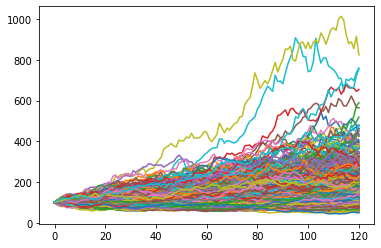

In [22]:
price_eq.plot(legend=False)

In [23]:
rets_eq.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
1,-0.046105,0.055236,-0.004641,0.099465,-0.032437,0.092762,0.017425,-0.033506,0.061287,-0.069416,...,0.033249,0.073597,-0.035458,0.007679,0.075702,0.003495,0.024770,-0.009288,0.037748,0.097384
2,-0.029223,-0.092239,0.002949,0.094240,-0.002121,-0.030227,-0.014515,-0.023383,-0.033635,0.020644,...,-0.014184,0.015853,0.070620,-0.070588,-0.068581,0.042313,0.037708,0.045734,0.022402,0.020294
3,0.025353,0.058921,-0.003369,0.046608,0.014727,0.095478,0.001644,-0.030078,0.020890,0.012383,...,0.005760,0.007347,0.029047,-0.013983,-0.123700,0.061872,-0.025852,0.022121,0.025210,0.055311
4,-0.068349,-0.014488,0.018276,0.071942,0.008220,0.042313,0.004467,-0.049058,-0.101579,0.085994,...,0.010747,-0.010524,0.056398,0.004739,0.070865,-0.005734,0.065041,0.007839,0.070754,0.016345
5,-0.020176,0.008271,-0.041438,0.045924,-0.071719,0.016524,-0.004501,-0.043787,0.028796,-0.053753,...,-0.081470,-0.053422,0.021189,0.030812,0.016735,-0.058476,-0.023029,-0.043848,-0.005631,-0.013938


In [24]:
rets_bond.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
1,-0.0416132,-0.0249339,0.0730491,-0.00811942,-0.0235232,-0.00860498,-0.0106617,0.0014845,0.0216964,-0.069735,...,-0.0280022,-0.0222049,-0.0267514,-0.0523175,0.0332129,0.0100933,0.00834554,-0.00862175,0.0261181,0.0111735
2,0.00316362,0.02414,-0.00813385,-0.0209604,-0.0286808,0.0480978,0.00330117,0.0510003,0.0142167,-0.0221006,...,-0.00583002,-0.00834409,0.0597246,-0.0449565,-0.0274308,-0.0125041,-0.011486,-0.00524908,-0.0242776,0.0048023
3,-0.0521248,-0.0287325,0.0268104,0.0688717,-0.014063,-0.00527493,-0.0422475,-0.0317692,-0.00252684,-0.0202308,...,0.0261638,-0.0523695,-0.0337966,-0.0569446,0.0319311,0.018085,0.0192058,0.00291797,-0.0352787,-0.0101788
4,0.0167499,0.0135372,-0.0378455,-0.0300426,0.0159807,0.0409567,-0.0319875,0.00545174,0.0340127,0.021848,...,0.0210637,0.0224776,-0.0718785,0.0192194,0.028514,-0.0161033,-0.0254212,-0.0110962,-0.0224148,0.0379284
5,0.0453009,0.00624529,-0.0212788,-0.0132989,0.0295256,0.0166989,-0.00130841,-0.0271407,-0.0182239,-0.0264681,...,-0.0039649,-0.000489011,-0.00780314,-0.000456822,0.0227159,0.0397413,-0.0299085,-0.00406997,-0.0703063,0.0094412


In [25]:
rets_7030b = eri.bt_mix(rets_eq, rets_bond,allocator=eri.fixedmix_allocator,w1=0.7)
rets_7030b_mean = rets_7030b.mean(axis=1)
eri.Summary_Stats(pd.DataFrame(rets_7030b_mean))

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher Var(5%),HistoricCVaR(5%),Sharp Ratio,Max Drawdown
0,0.058848,0.005003,-0.303161,3.402506,-0.002302,-0.001514,-0.001514,-0.000086


##### More money you put in the PSP more returns

In [10]:
summaries = eri.Summary_Stats(rets_7030b)
# Run summary for 500 different scenarios

In [11]:
summaries.head()

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher Var(5%),HistoricCVaR(5%),Sharp Ratio,Max Drawrown
0,0.015336,0.117876,0.015414,2.696683,0.053953,0.062891,0.062891,-0.216608
1,0.028323,0.103329,-0.328953,2.657313,0.049008,0.062092,0.062092,-0.206325
2,0.042513,0.109785,0.196907,2.679917,0.046356,0.055232,0.055232,-0.144349
3,0.032478,0.104145,-0.115776,2.220989,0.047578,0.055519,0.055519,-0.261485
4,0.032663,0.099255,0.035547,3.718667,0.043141,0.058048,0.058048,-0.161422


In [12]:
summaries.mean()

Annualized Return         0.054825
Annualized Vol            0.107503
Skewness                 -0.000494
Kurtosis                  2.931582
Cornish-Fisher Var(5%)    0.045954
HistoricCVaR(5%)          0.057905
Sharp Ratio               0.057905
Max Drawrown             -0.212500
dtype: float64

In [13]:
def terminal_values(rets):
    """
    Returns the final values of a dollar at the end of the return period for each scenario
    """
    return (rets+1).prod()

In [27]:
eri.terminal_values(rets_bond)

0      1.569679
1      1.295987
2      1.363067
3      1.137965
4      1.272917
         ...   
495    1.476585
496    1.476125
497    1.166301
498    1.173573
499    1.481808
Length: 500, dtype: float64

In [20]:
pd.concat([
    eri.terminal_stats(rets_bond,name="FI"),
    eri.terminal_stats(rets_eq,name="Eq"),
    eri.terminal_stats(rets_7030b,name="70/30")
],axis=1)

,FI,Eq,70/30
mean,1.395895,1.984841,1.796006
std,0.103255,0.986995,0.617590
p_breach,NaN,0.062000,0.024000
e_short,NaN,0.166760,0.101260
p_reach,NaN,NaN,NaN
e_surplus,NaN,NaN,NaN


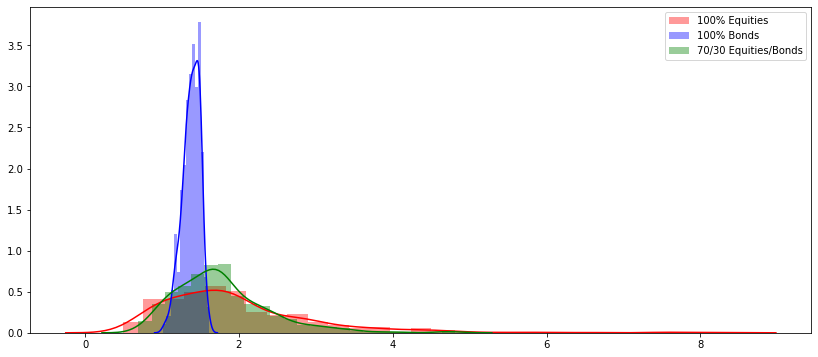

In [29]:
import seaborn as sns
import matplotlib .pyplot as plt
plt.figure(figsize=(14,6))
sns.distplot(eri.terminal_values(rets_eq),color="red",label="100% Equities")
sns.distplot(eri.terminal_values(rets_bond),color="blue",label="100% Bonds")
sns.distplot(eri.terminal_values(rets_7030b),color="green",label="70/30 Equities/Bonds")
plt.legend();

# Glide Paths for Allocation

In [30]:
def glidepath_allocator(r1,r2,start_glide=1,end_glide=0):
    """
    Simulates a Target-Date-Fund style gradual move from r1 to r2
    """
    n_points = r1.shape[0]
    n_col = r1.shape[1]
    path = pd.Series(data=np.linspace(start_glide, end_glide,num=n_points))
    paths = pd.concat([path]*n_col,axis=1)
    paths.index = r1.index
    paths.columns = r1.columns
    return paths

In [37]:
rets_g8020 = eri.bt_mix(rets_eq,rets_bond,allocator = eri.glidepath_allocator,start_glide=.80,end_glide=.20)
rets_g8020.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
1,-0.0452068,0.0392017,0.0108974,0.0779482,-0.0306542,0.0724889,0.0118078,-0.0265076,0.0533687,-0.0694795,...,0.020999,0.0544364,-0.0337167,-0.00432065,0.0672043,0.00481454,0.0214847,-0.00915459,0.0354218,0.0801422
2,-0.0225824,-0.0683764,0.000676485,0.0706194,-0.00756648,-0.0141673,-0.0108622,-0.00813127,-0.0238237,0.0118796,...,-0.0124713,0.0108919,0.0683863,-0.0653323,-0.0601435,0.031073,0.027621,0.0352806,0.0128308,0.0171174
3,0.00907634,0.0405063,0.00297097,0.0512856,0.00867857,0.0743116,-0.0075768,-0.0304333,0.0159704,0.00553134,...,0.0100463,-0.00519878,0.0158448,-0.0230084,-0.0910042,0.052673,-0.0163859,0.0180871,0.0125021,0.0415527
4,-0.050042,-0.00845869,0.00620285,0.0500028,0.00988918,0.0420216,-0.00337538,-0.0373315,-0.0724099,0.0721948,...,0.0129662,-0.00342479,0.0288025,0.00785396,0.0617545,-0.0079645,0.0455804,0.00376543,0.0507113,0.0209881
5,-0.00575985,0.00782539,-0.0369992,0.0328852,-0.0494286,0.0165628,-0.00379846,-0.0401221,0.0184435,-0.0477457,...,-0.0644059,-0.0417677,0.0148056,0.0239274,0.0180516,-0.0368515,-0.0245433,-0.03509,-0.0198701,-0.0087905


In [38]:
pd.concat([
    eri.terminal_stats(rets_bond,name="FI"),
    eri.terminal_stats(rets_eq,name="Eq"),
    eri.terminal_stats(rets_7030b,name="70/30"),
    eri.terminal_stats(rets_g8020,name="Glide 80 to 20")
],axis=1)

,FI,Eq,70/30,Glide 80 to 20
mean,1.379077,1.955310,1.769669,1.653141
std,0.113108,1.029534,0.622872,0.453922
p_breach,NaN,0.052000,0.012000,NaN
e_short,NaN,0.113626,0.053554,NaN
p_reach,NaN,NaN,NaN,NaN
e_surplus,NaN,NaN,NaN,NaN
